### Insurance Claims- Fraud Detection
Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

Note: Use the link below to reach to your dataset. 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option
display(df.head())

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [38]:
df = df.drop(['_c39','policy_number'],axis=1)

In [39]:
df.shape

(1000, 38)

In [60]:
import calendar
df["policy_bind_year"] = df['policy_bind_date'].str.split('-').str[2].astype(int)
df['policy_bind_Month'] = df['policy_bind_date'].str.split('-').str[1].astype(int)
df['policy_bind_Month'] = df['policy_bind_Month'].apply(lambda x: calendar.month_abbr[x])
df['policy_bind_Day'] = df['policy_bind_date'].str.split('-').str[0].astype(int)
df['my_dates'] = pd.to_datetime(df['policy_bind_date'])
df['policy_bind_day_of_week'] = df['my_dates'].dt.day_name()

In [61]:
df["incident_date_year"] = df['incident_date'].str.split('-').str[2].astype(int)
df['incident_date_Month'] = df['incident_date'].str.split('-').str[1].astype(int)
df['incident_date_Month'] = df['incident_date_Month'].apply(lambda x: calendar.month_abbr[x])
df['incident_date_my_dates'] = pd.to_datetime(df['incident_date'])
df['incident_date_day'] = df['incident_date_my_dates'].dt.day_name()

In [71]:
df1 = df.drop(['policy_bind_date','incident_date','my_dates','incident_date_my_dates','day_of_week','policy_bind_Day'],axis=1)

In [72]:
df1.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_Month,policy_bind_day_of_week,incident_date_year,incident_date_Month,incident_date_day
0,328,48,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,2014,Oct,Friday,2015,Jan,Sunday
1,228,42,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,2006,Jun,Tuesday,2015,Jan,Wednesday
2,134,29,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,2000,Sep,Friday,2015,Feb,Sunday
3,256,41,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1990,May,Friday,2015,Jan,Thursday
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,2014,Jun,Friday,2015,Feb,Tuesday


In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      

In [74]:
df1.to_excel("insurance.xlsx", sheet_name="Testing", index=False)

In [75]:
df1.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_year,incident_date_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,2001.604000,2015.0
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,7.360391,0.0
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,1990.000000,2015.0
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,1995.000000,2015.0
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,2002.000000,2015.0
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,2008.000000,2015.0
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,2015.000000,2015.0


In [76]:
[i for i in df1.columns if df1[i].isnull().sum()>0]

[]

In [77]:
df1['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [78]:
df1.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'policy_bind_year',
       'policy_bind_Month', 'policy_bind_day_of_week', 'incident_date_year',
       'incident_date_Month', 'incident_date_day'],
      dtype='object')

In [90]:
df1.select_dtypes(exclude=['object']).columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'policy_bind_year', 'incident_date_year'],
      dtype='object')

In [79]:
df1.select_dtypes(exclude=['int']).columns

Index(['policy_state', 'policy_csl', 'policy_annual_premium', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'property_damage',
       'police_report_available', 'auto_make', 'auto_model', 'fraud_reported',
       'policy_bind_Month', 'policy_bind_day_of_week', 'incident_date_Month',
       'incident_date_day'],
      dtype='object')

In [ ]:
['policy_annual_premium','incident_location']

In [91]:
features = [ 'policy_state', 'policy_csl',  'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'property_damage',
       'police_report_available', 'auto_make', 'auto_model','policy_bind_Month', 'policy_bind_day_of_week', 'incident_date_Month',
       'incident_date_day' ,'incident_date_year','policy_bind_year']

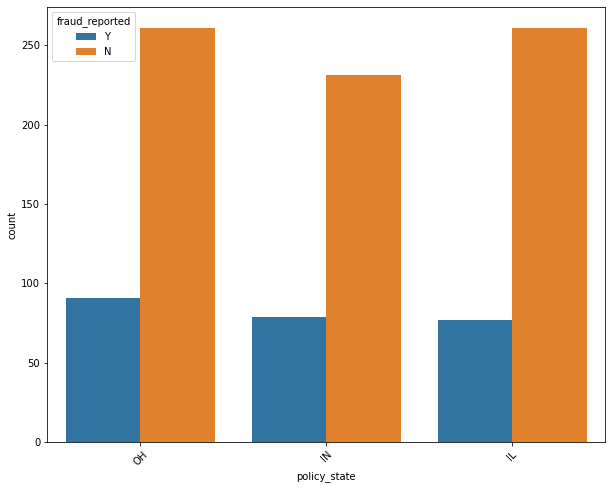

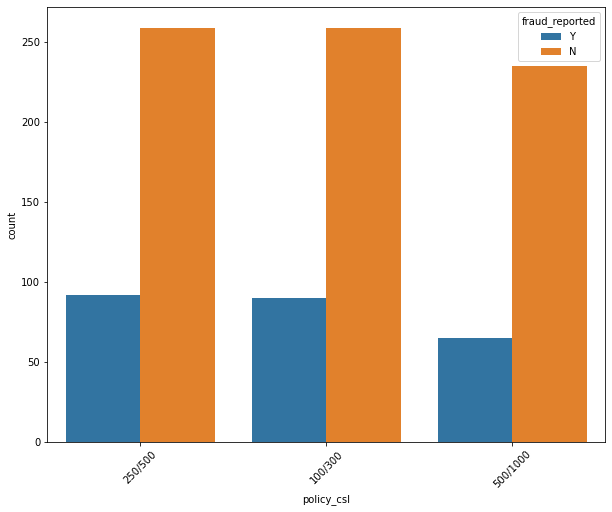

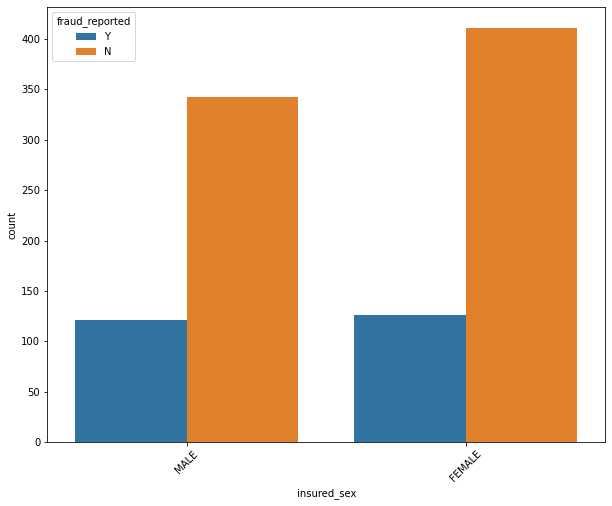

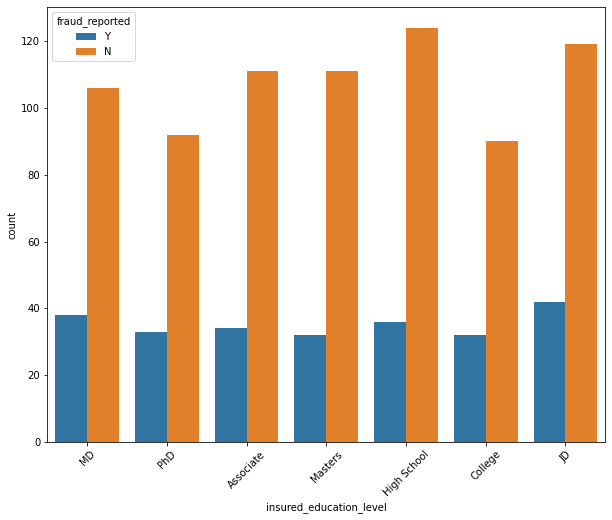

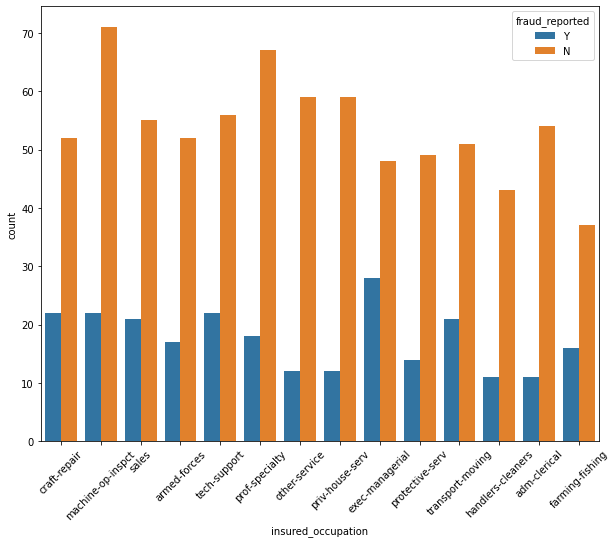

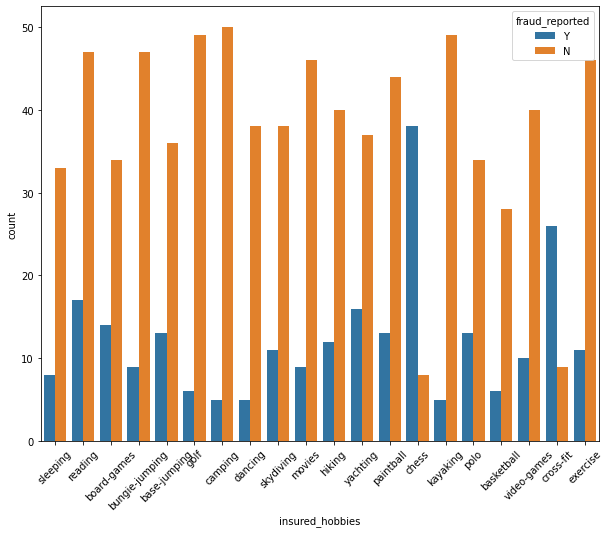

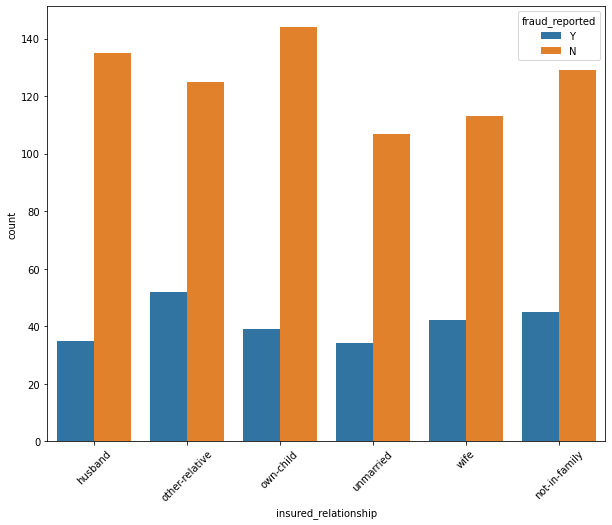

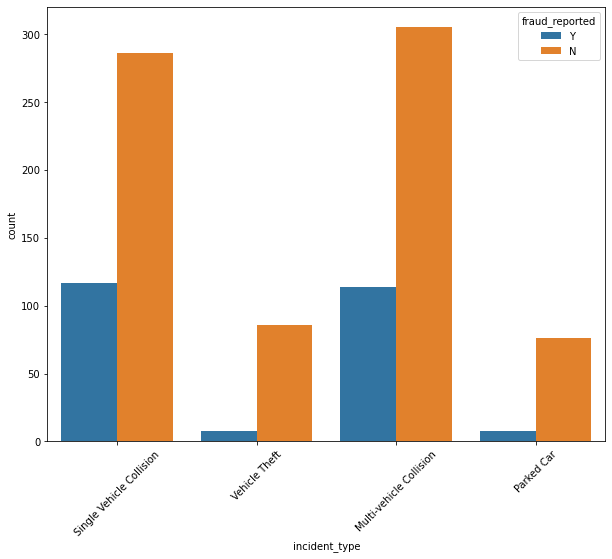

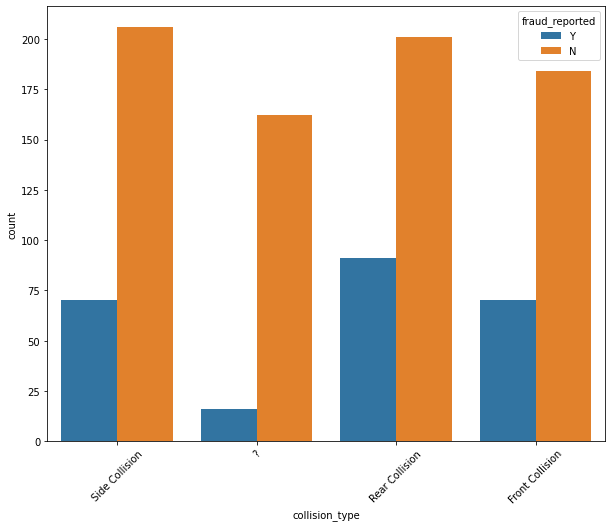

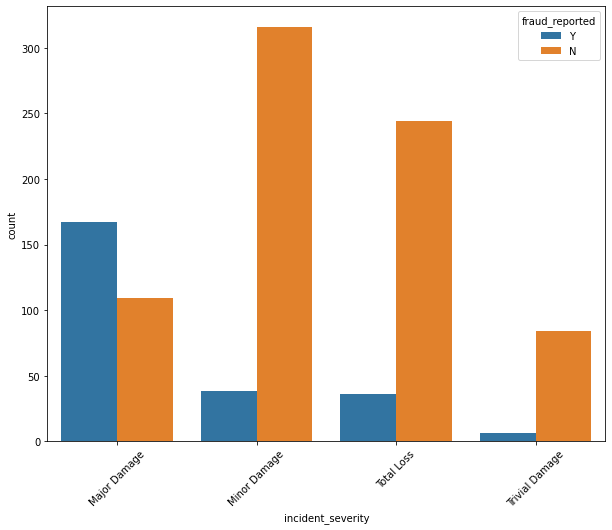

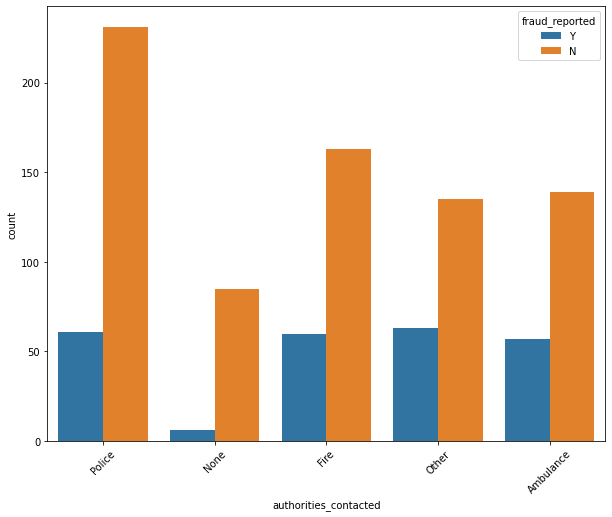

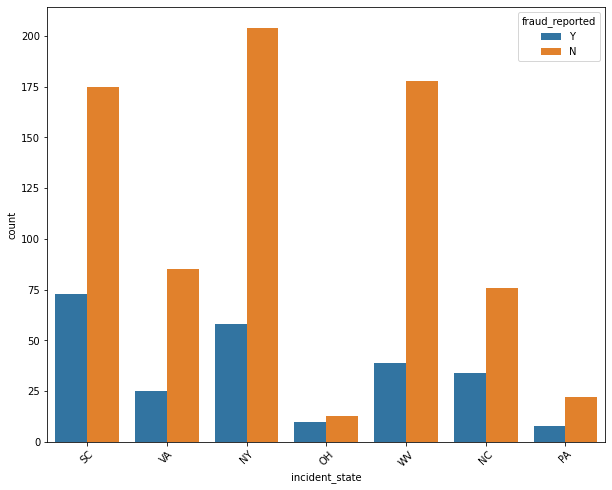

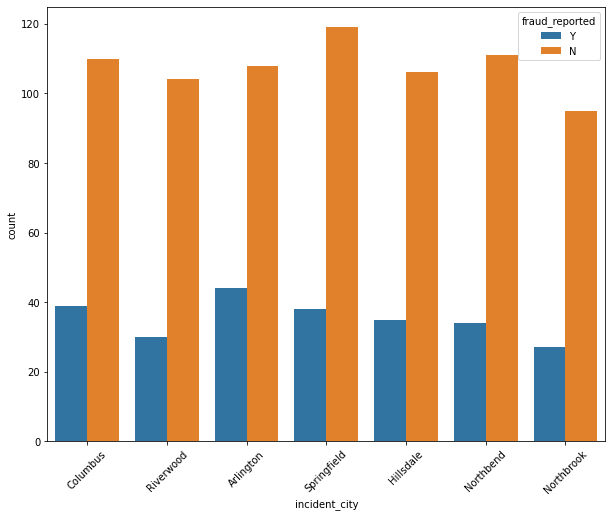

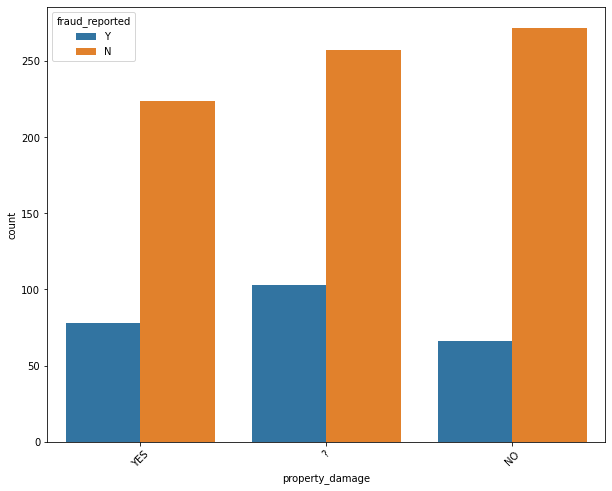

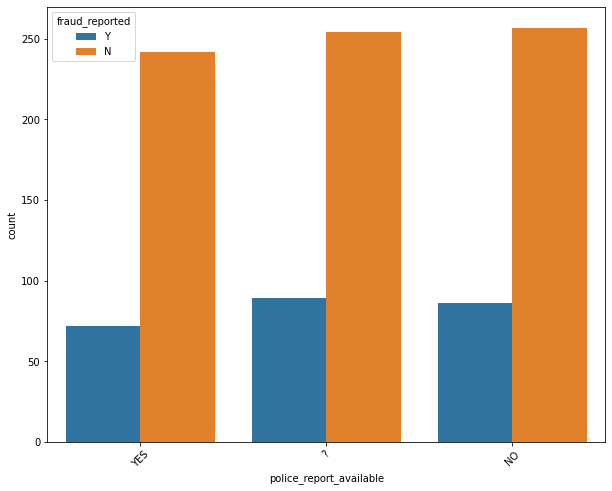

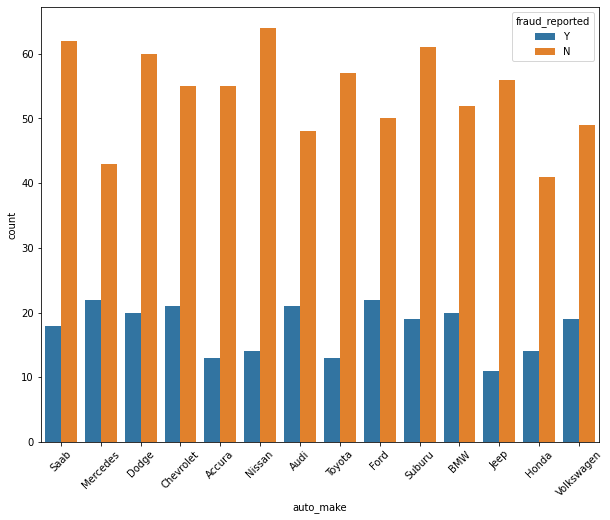

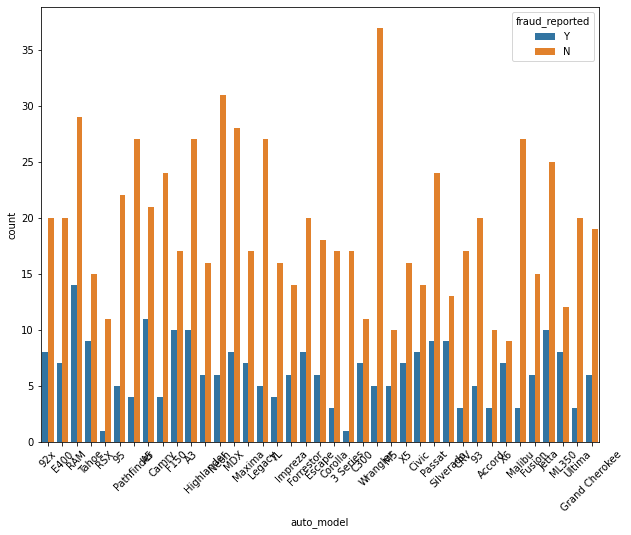

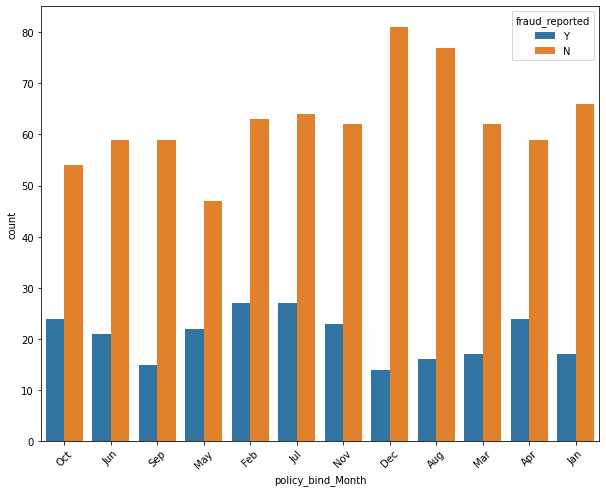

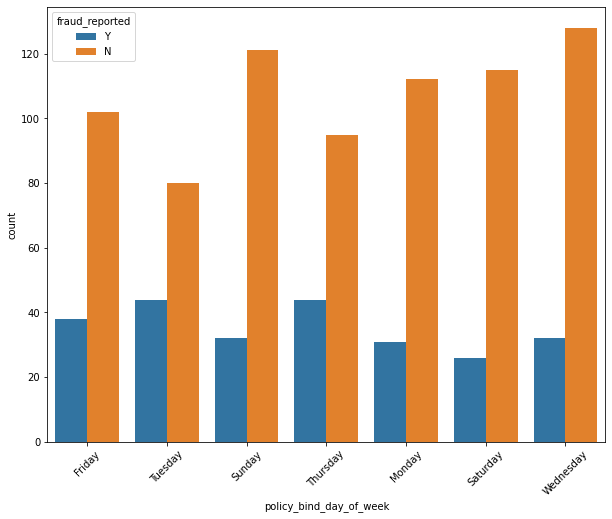

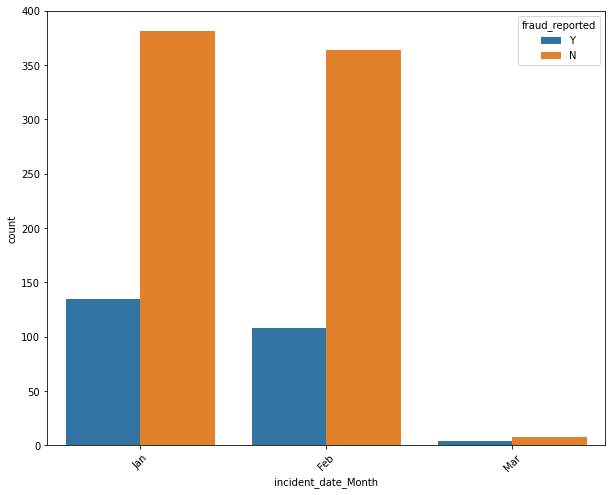

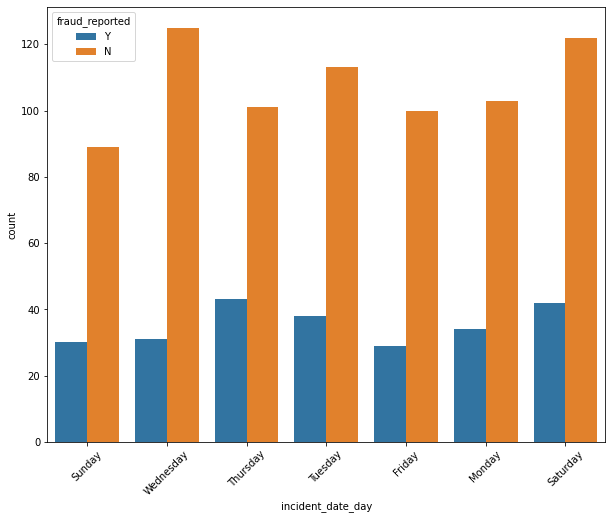

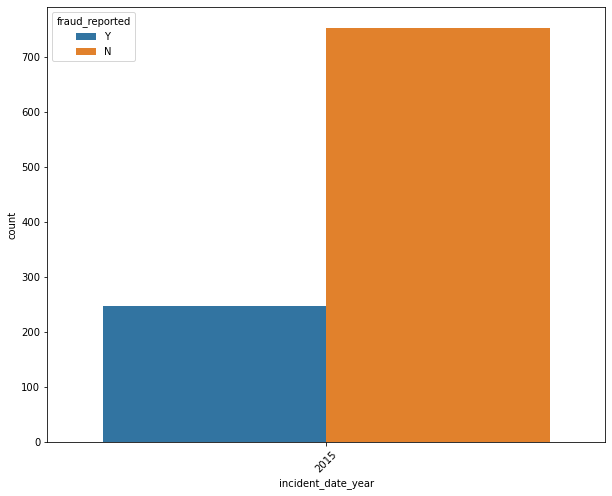

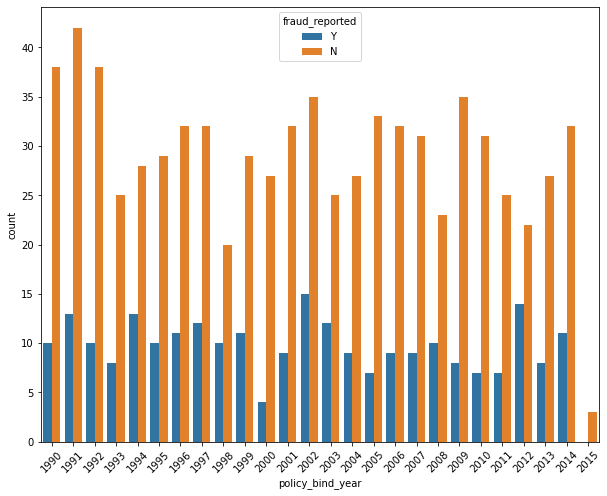

In [92]:
for i in features:
    plt.figure(figsize=(10,8))
    sns.countplot(x = df1[i], hue = df1['fraud_reported'])
    plt.xticks(rotation = 45)
    plt.show()

In [86]:
df1['incident_location']

(1000,)

In [93]:
fea = ['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year']

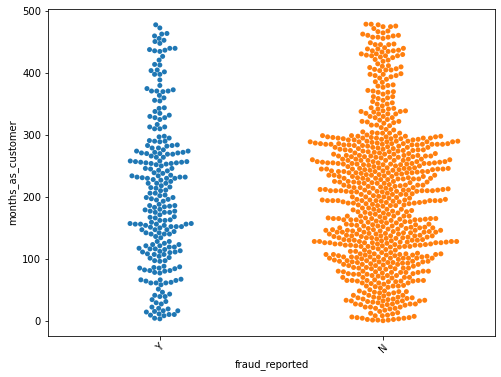

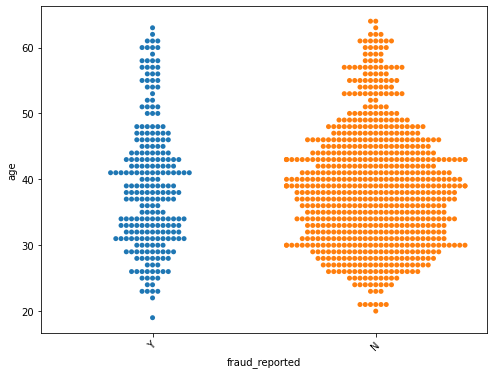

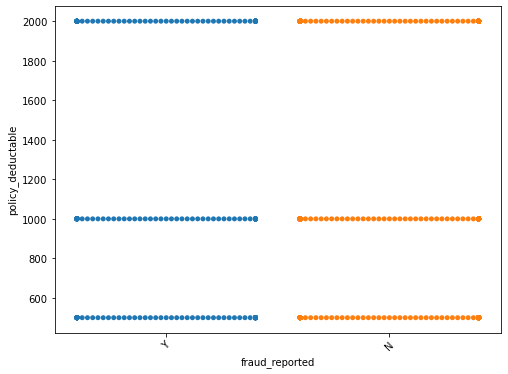

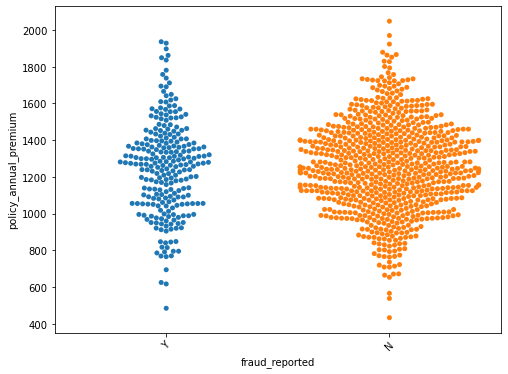

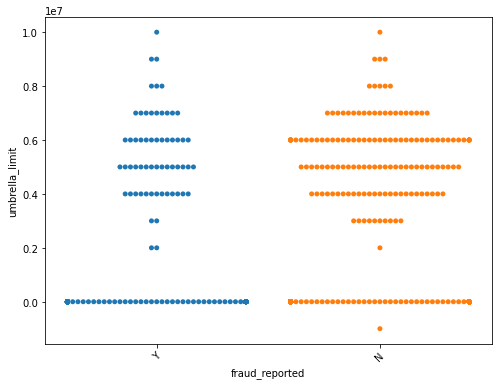

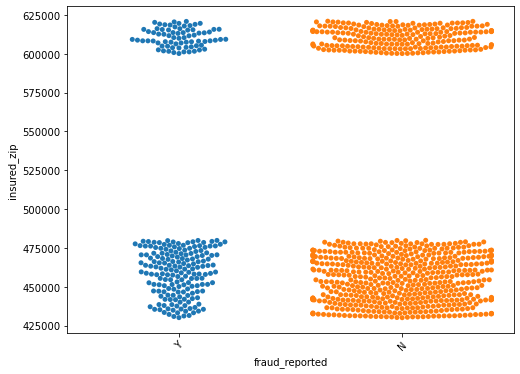

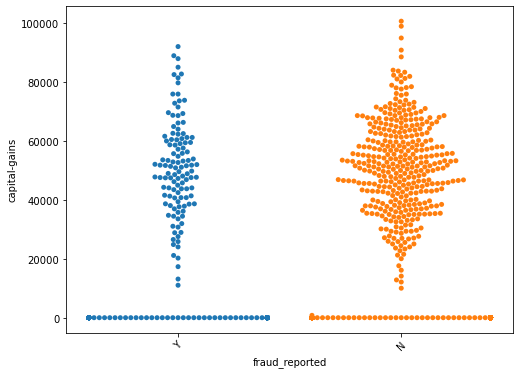

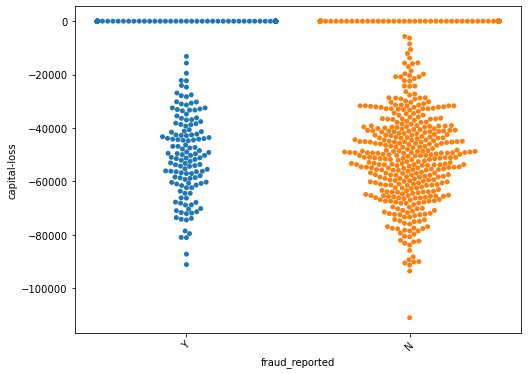

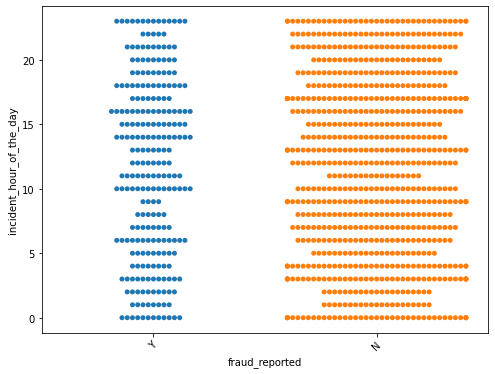

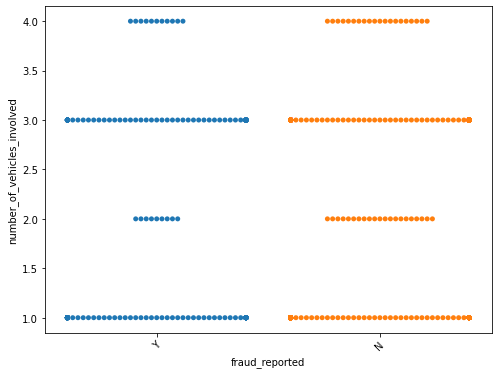

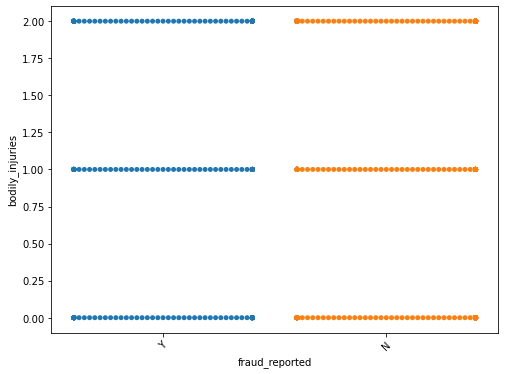

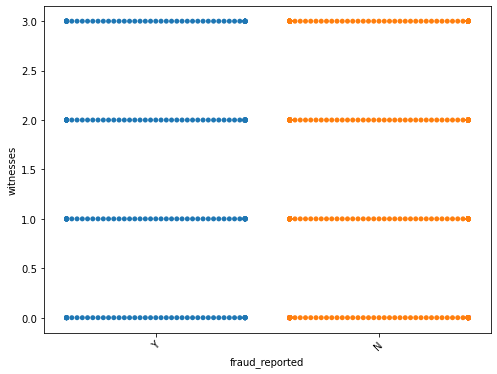

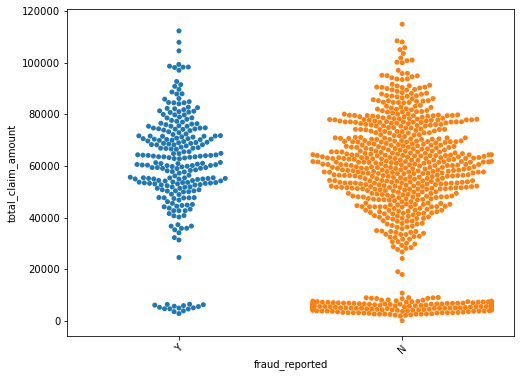

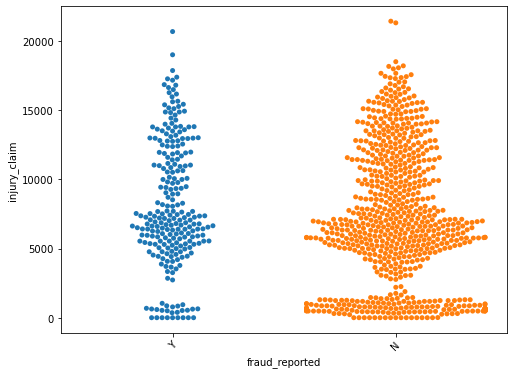

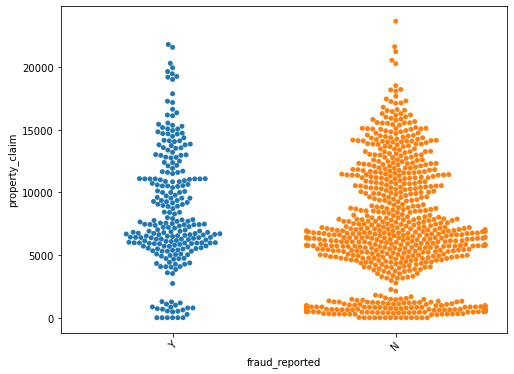

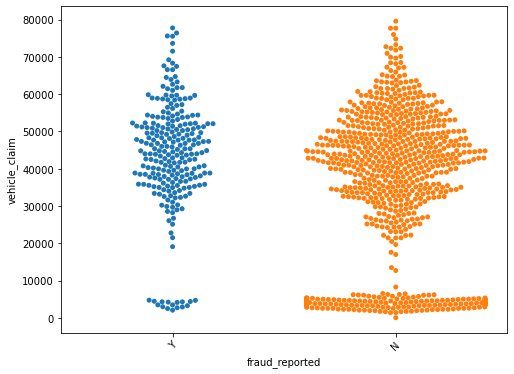

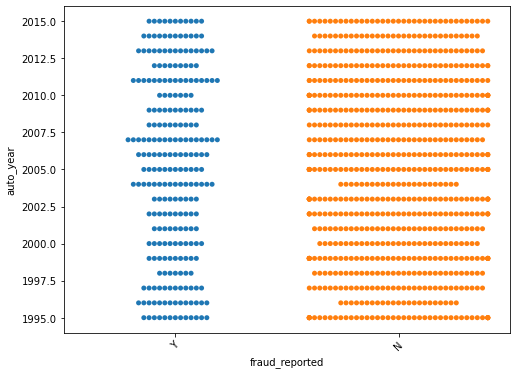

In [100]:
for i in fea:
    plt.figure(figsize=(8,6))
    sns.swarmplot(y = df1[i], x = df1['fraud_reported'])
    plt.xticks(rotation = 45)
    plt.show()

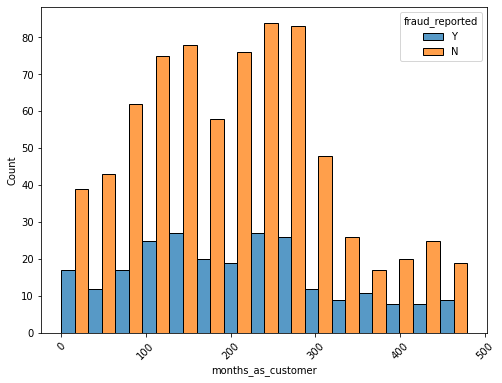

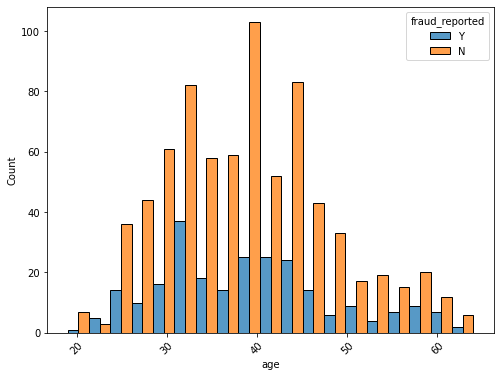

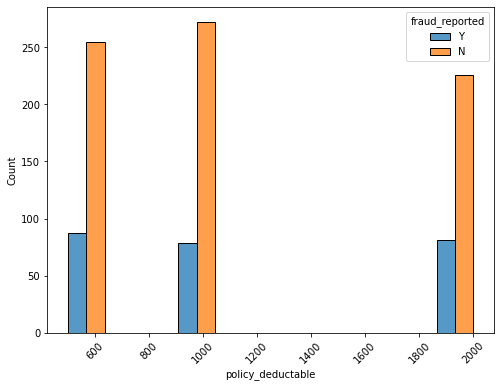

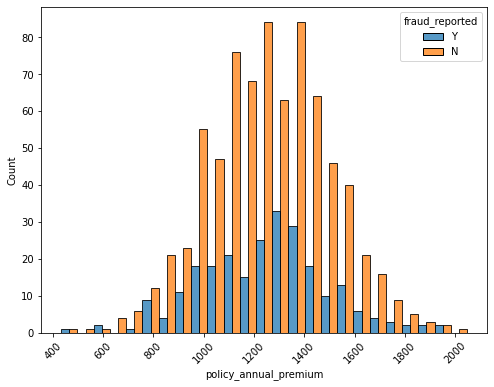

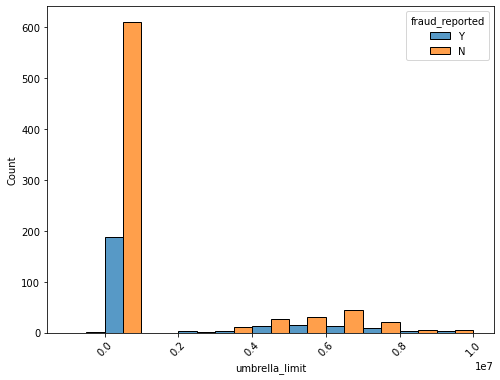

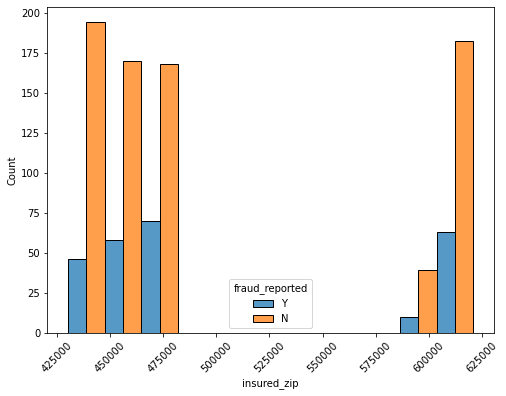

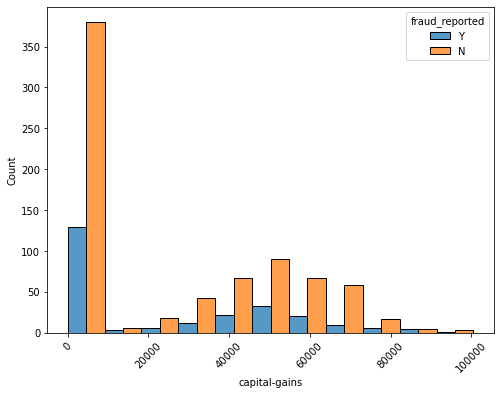

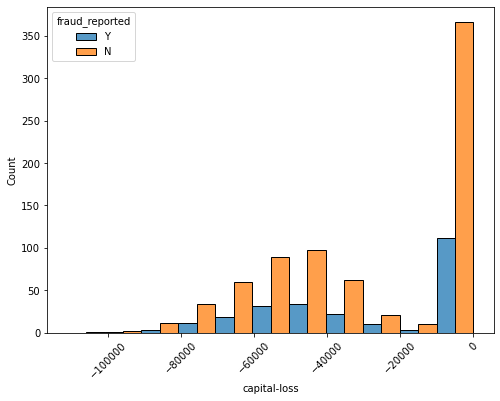

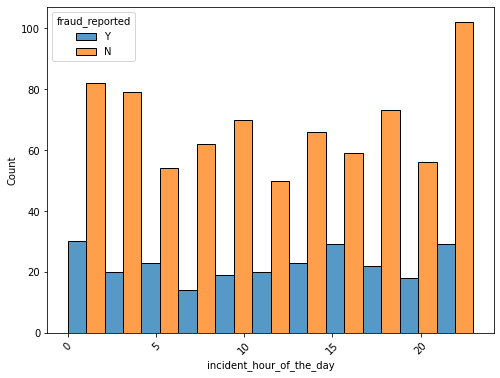

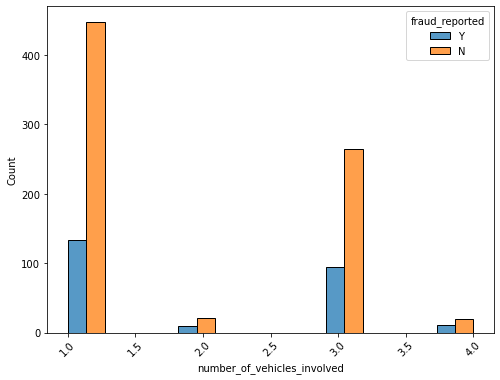

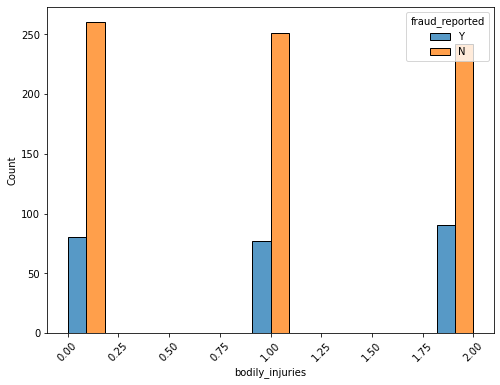

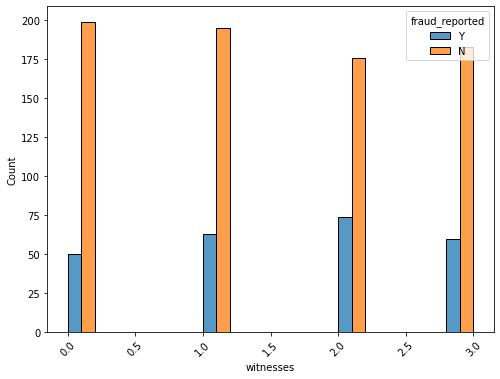

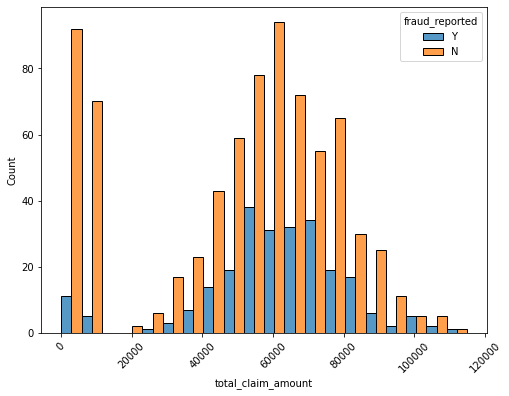

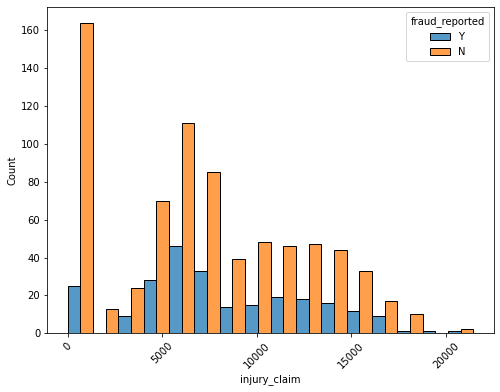

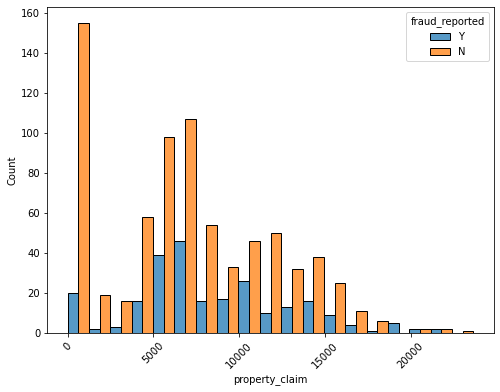

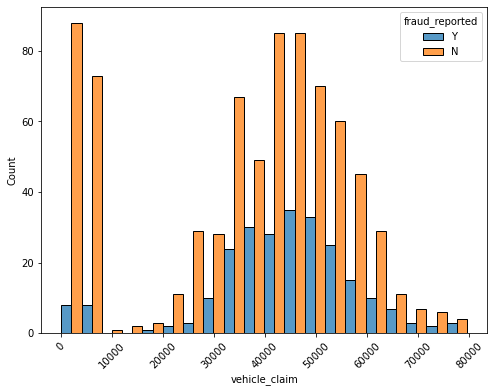

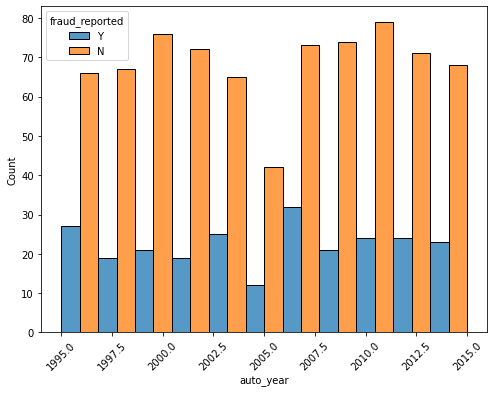

In [108]:
for i in fea:
    plt.figure(figsize=(8,6))
    sns.histplot(x = df1[i],hue=df1['fraud_reported'],multiple='dodge')
    plt.xticks(rotation = 45)
    plt.show()

In [110]:
df1.select_dtypes(exclude=['int']).columns

Index(['policy_state', 'policy_csl', 'policy_annual_premium', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'property_damage',
       'police_report_available', 'auto_make', 'auto_model', 'fraud_reported',
       'policy_bind_Month', 'policy_bind_day_of_week', 'incident_date_Month',
       'incident_date_day'],
      dtype='object')

In [112]:
df['incident_location'].nunique()

1000

In [113]:
for i in df1.select_dtypes(exclude=['int']).columns:
    print(i,df[i].nunique())

policy_state 3
policy_csl 3
policy_annual_premium 991
insured_sex 2
insured_education_level 7
insured_occupation 14
insured_hobbies 20
insured_relationship 6
incident_type 4
collision_type 4
incident_severity 4
authorities_contacted 5
incident_state 7
incident_city 7
incident_location 1000
property_damage 3
police_report_available 3
auto_make 14
auto_model 39
fraud_reported 2
policy_bind_Month 12
policy_bind_day_of_week 7
incident_date_Month 3
incident_date_day 7


In [115]:
category = ['policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'property_damage',
       'police_report_available', 'auto_make', 'auto_model', 'fraud_reported',
       'policy_bind_Month', 'policy_bind_day_of_week', 'incident_date_Month',
       'incident_date_day']
lab = LabelEncoder()
for i in category:
    df1[i] = lab.fit_transform(df1[i])

print(df1.dtypes)

months_as_customer             int64  
age                            int64  
policy_state                   int64  
policy_csl                     int64  
policy_deductable              int64  
policy_annual_premium          float64
umbrella_limit                 int64  
insured_zip                    int64  
insured_sex                    int64  
insured_education_level        int64  
insured_occupation             int64  
insured_hobbies                int64  
insured_relationship           int64  
capital-gains                  int64  
capital-loss                   int64  
incident_type                  int64  
collision_type                 int64  
incident_severity              int64  
authorities_contacted          int64  
incident_state                 int64  
incident_city                  int64  
incident_location              object 
incident_hour_of_the_day       int64  
number_of_vehicles_involved    int64  
property_damage                int64  
bodily_injuries          

In [116]:
df1 = df1.drop(['incident_location'],axis=1)

In [117]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int64  
 3   policy_csl                   1000 non-null   int64  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   int64  
 9   insured_education_level      1000 non-null   int64  
 10  insured_occupation           1000 non-null   int64  
 11  insured_hobbies              1000 non-null   int64  
 12  insured_relationship         1000 non-null   int64  
 13  capital-gains      

In [119]:
z = np.abs(zscore(df1))
print(z)

     months_as_customer       age  policy_state  policy_csl  \
0    1.078140            0.990836  1.187173      0.060937     
1    0.208995            0.334073  0.016856      0.060937     
2    0.608002            1.088913  1.187173      1.182668     
3    0.452355            0.224613  1.220886      0.060937     
4    0.208995            0.552994  1.220886      1.304542     
5    0.452355            0.005692  1.187173      0.060937     
6    0.581927            0.541611  0.016856      0.060937     
7    0.338567            0.213229  1.220886      1.182668     
8    1.537987            0.651071  1.220886      1.182668     
9    0.069931            0.334073  1.220886      1.182668     
10   0.269835            0.334073  1.187173      1.182668     
11   2.112422            2.413823  1.187173      1.182668     
12   1.251169            1.745676  1.187173      1.304542     
13   0.720991            0.541611  1.187173      1.182668     
14   0.208195            0.103769  1.187173      0.0609

In [121]:
threshold = 3
print(np.where(z<3))
print(df1.shape)

(array([  0,   0,   0, ..., 999, 999, 999], dtype=int64), array([ 0,  1,  2, ..., 37, 39, 40], dtype=int64))
(1000, 41)


In [126]:
df_new = df1[(z<3).all(axis = 1)]

In [127]:
df_new

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_year,policy_bind_Month,policy_bind_day_of_week,incident_date_year,incident_date_Month,incident_date_day


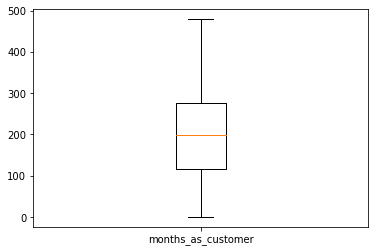

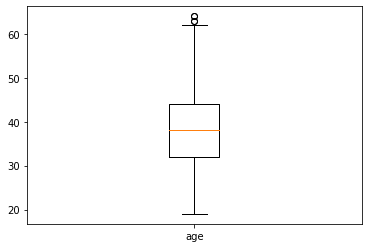

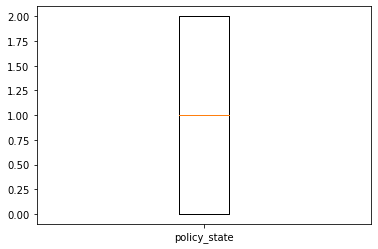

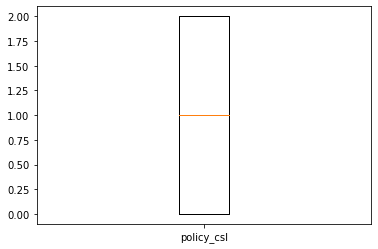

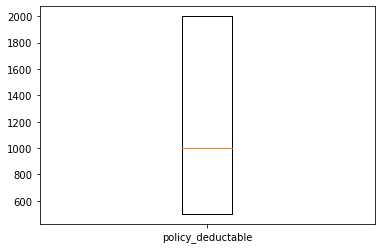

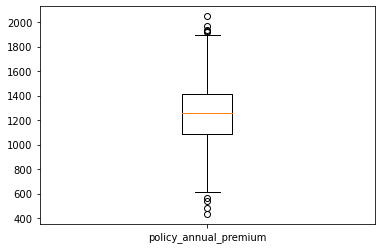

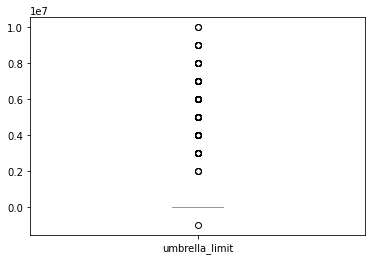

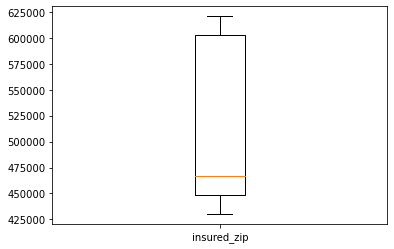

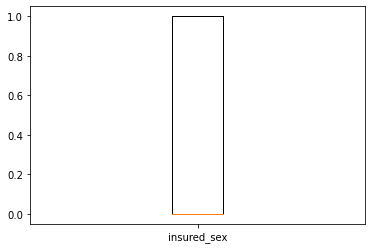

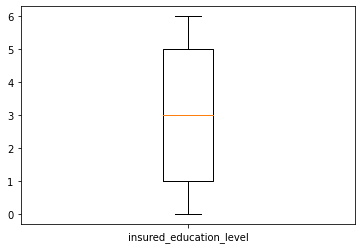

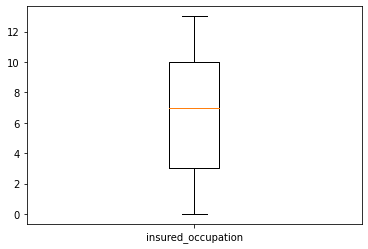

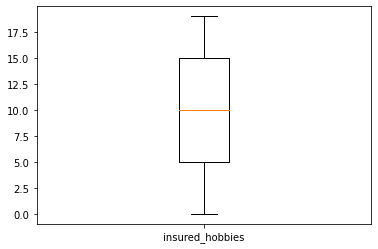

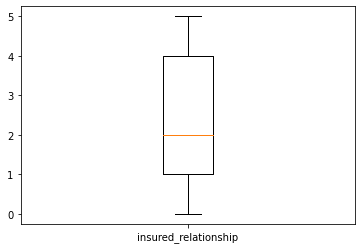

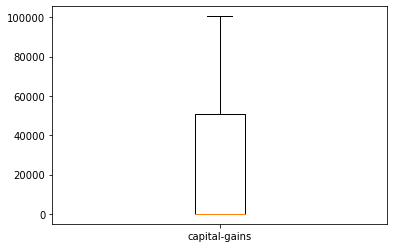

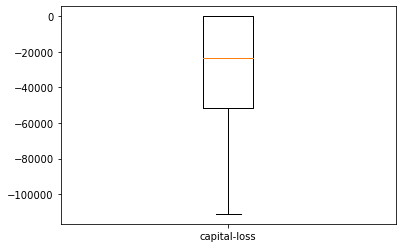

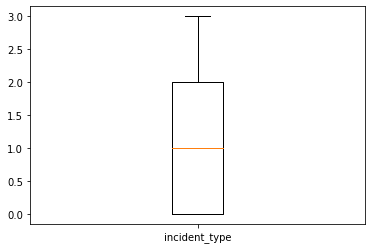

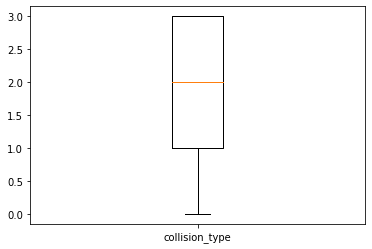

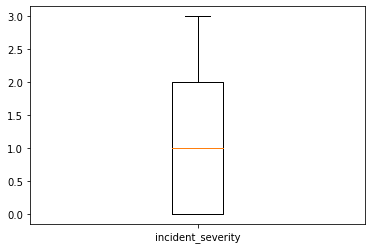

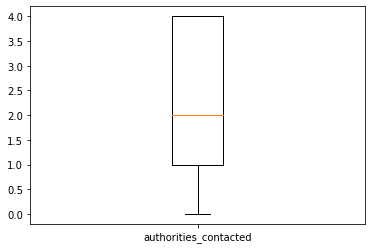

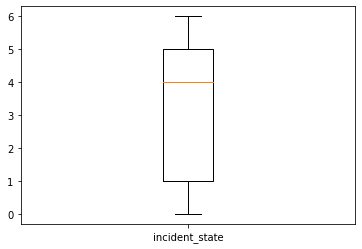

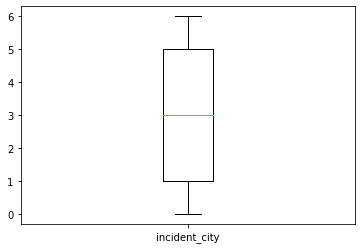

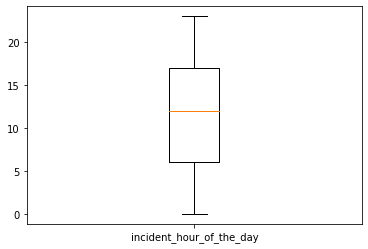

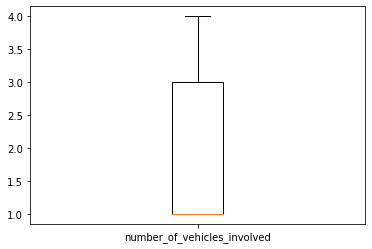

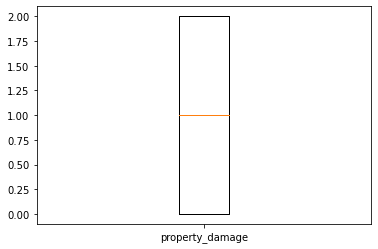

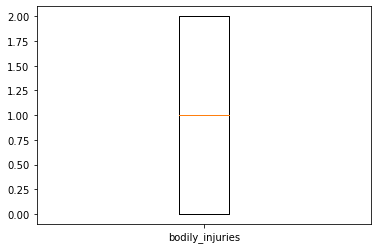

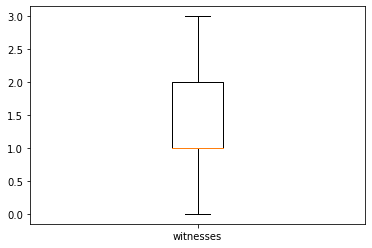

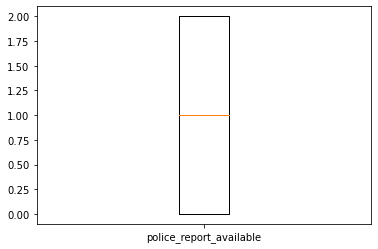

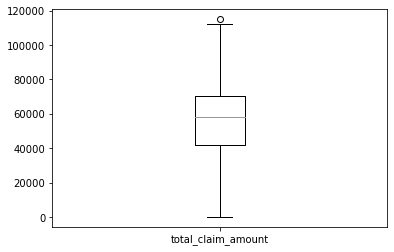

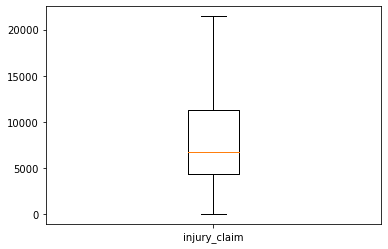

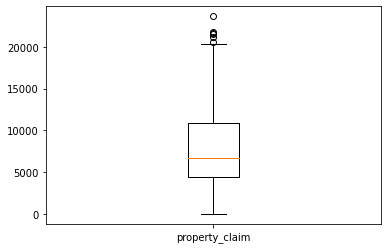

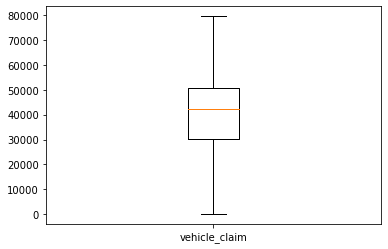

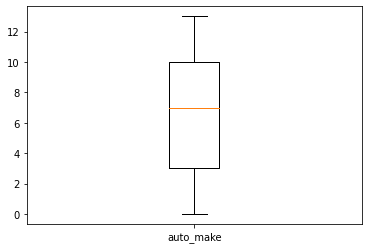

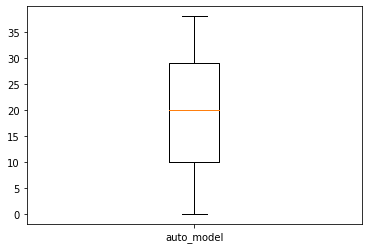

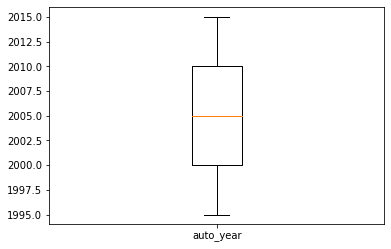

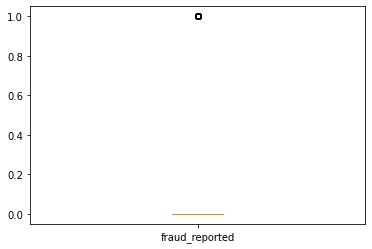

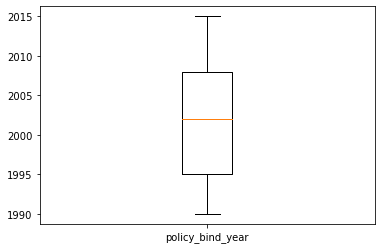

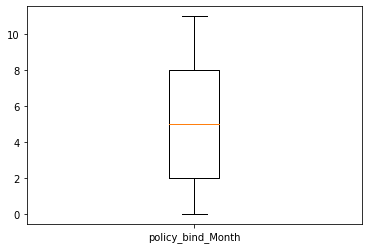

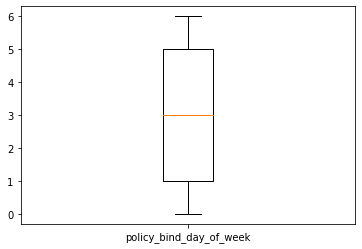

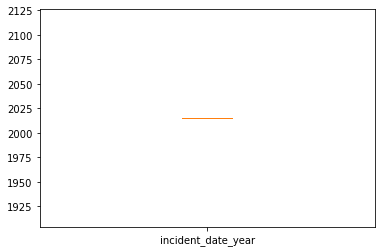

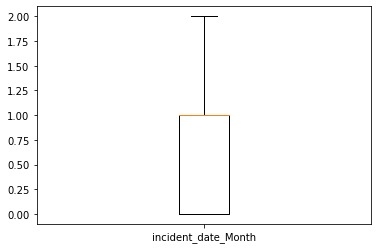

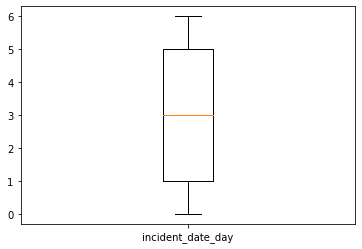

In [128]:
for i in df1.columns:
    plt.boxplot(df1[i], labels = [i])
    plt.show()

In [129]:
X = df1.drop(['fraud_reported'],axis=1)
y = df1['fraud_reported']

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
for i in X.columns:
    scaler = StandardScaler()
    X[i] = scaler.fit_transform(X[i].values.reshape(-1, 1))

In [132]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state=42)

In [133]:
ROS.fit(X,y)

RandomOverSampler(random_state=42)

In [134]:
X_ros, Y_ros= ROS.fit_resample(X, y)

In [135]:
Y_ros.value_counts(normalize=True)

1    0.5
0    0.5
Name: fraud_reported, dtype: float64

In [136]:
reg_model = [LinearRegression(),GradientBoostingRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),ExtraTreesRegressor(),RandomForestRegressor()]
max_r2_score = 0
for r_state in range(42,95):
    X_train, X_test, y_train, y_test = train_test_split(X_ros, Y_ros,random_state = r_state,test_size = 0.33)
    for i in reg_model:
        i.fit(X_train,y_train)
        pred = i.predict(X_test)
        r2_scores = r2_score(y_test,pred)
        print("R2 score for the random state is" ,r_state ,"is", r2_scores)
        if r2_scores > max_r2_score:
            max_r2_score = r2_scores
            final_state = r_state
            final_model = i
print()
print()
print()
print()
print("Maximum R2 score in the random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score for the random state is 42 is 0.21855761139443752
R2 score for the random state is 42 is 0.6096324479085828
R2 score for the random state is 42 is 0.4354924232887194
R2 score for the random state is 42 is 0.5481524774335995
R2 score for the random state is 42 is 0.1824787323852196
R2 score for the random state is 42 is 0.7777918777193324
R2 score for the random state is 42 is 0.7268815718553152
R2 score for the random state is 43 is 0.20352784163217996
R2 score for the random state is 43 is 0.6115872824052383
R2 score for the random state is 43 is 0.48193273918662927
R2 score for the random state is 43 is 0.5730517375518673
R2 score for the random state is 43 is 0.19765949170124475
R2 score for the random state is 43 is 0.7396960888874482
R2 score for the random state is 43 is 0.6958694469657677
R2 score for the random state is 44 is 0.18365312857863914
R2 score for the random state is 44 is 0.600419192781708
R2 score for the random state is 44 is 0.27923368437278484
R2 score 

In [137]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]

In [138]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [139]:
ETR=ExtraTreesRegressor()
RandomizedSearch_ETR=RandomizedSearchCV(estimator=ETR,param_distributions=param_grid,n_iter=100,cv=3,verbose=2,
                               random_state=68,n_jobs=-1)
RandomizedSearch_ETR.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=68, verbose=2)

In [140]:
RandomizedSearch_ETR.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 340}

In [141]:
RandomizedSearch_ETR.best_estimator_

ExtraTreesRegressor(max_depth=340, max_features='auto', n_estimators=300)

In [142]:
ETR = ExtraTreesRegressor(n_estimators=300,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=560,random_state=68)
ETR.fit(X_train,y_train)
pred = ETR.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 77.32959665021296


In [143]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error:  0.13572099262240106
Mean squared Error:  0.05664824502570981
Root Mean Absolute Error:  0.36840330158998447


Text(0, 0.5, 'Predicted_Y')

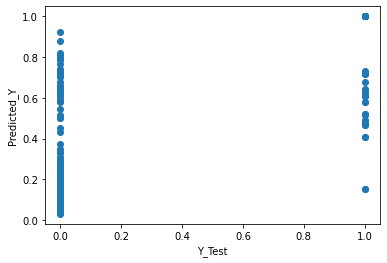

In [144]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

In [145]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [146]:
classification_model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    X_train, X_test, y_train, y_test = train_test_split(X_ros, Y_ros,random_state = r_state,test_size = 0.33)
    for j in classification_model:
        j.fit(X_train,y_train)
        pred_c = j.predict(X_test)
        ac_score = accuracy_score(y_test,pred_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model_classification = j
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model_classification)

accuracy score correspond to random state  40 is 0.8913480885311871
accuracy score correspond to random state  40 is 0.6921529175050302
accuracy score correspond to random state  41 is 0.8832997987927566
accuracy score correspond to random state  41 is 0.6740442655935613
accuracy score correspond to random state  42 is 0.8913480885311871
accuracy score correspond to random state  42 is 0.6941649899396378
accuracy score correspond to random state  43 is 0.8712273641851107
accuracy score correspond to random state  43 is 0.7062374245472837
accuracy score correspond to random state  44 is 0.8832997987927566
accuracy score correspond to random state  44 is 0.6659959758551308
accuracy score correspond to random state  45 is 0.8752515090543259
accuracy score correspond to random state  45 is 0.6619718309859155
accuracy score correspond to random state  46 is 0.8853118712273642
accuracy score correspond to random state  46 is 0.6841046277665996
accuracy score correspond to random state  47 is

In [147]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [149]:
dec = DecisionTreeClassifier(random_state=69)
grid_search = GridSearchCV(estimator=dec, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [150]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=69), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [151]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, random_state=69)

In [152]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50}

In [153]:
DTC = DecisionTreeClassifier(criterion='gini',max_depth=3, min_samples_leaf=50, random_state=69)
DTC.fit(X_train,y_train)
predc = DTC.predict(X_test)
acurracy_score = accuracy_score(y_test,predc)
print("Accuracy Score :",acurracy_score*100)

Accuracy Score : 84.70824949698189


In [154]:
pred_prob = DTC.predict_proba(X_test)[:,1]

In [155]:
fpr,tpr,thresholds = roc_curve(y_test,pred_prob,pos_label=True)

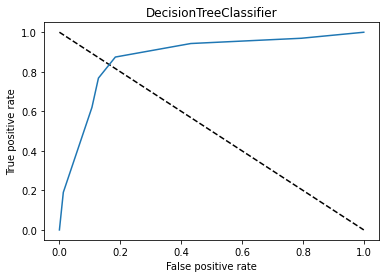

In [156]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.show()

In [157]:
confusion_matrix(y_test, predc)

array([[191,  43],
       [ 33, 230]], dtype=int64)

[Text(0.4230769230769231, 0.875, 'X[17] <= -0.728\ngini = 0.5\nsamples = 1009\nvalue = [519, 490]'),
 Text(0.15384615384615385, 0.625, 'X[7] <= -0.707\ngini = 0.279\nsamples = 412\nvalue = [69, 343]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.405\nsamples = 85\nvalue = [24, 61]'),
 Text(0.23076923076923078, 0.375, 'X[29] <= -0.241\ngini = 0.237\nsamples = 327\nvalue = [45, 282]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.35\nsamples = 84\nvalue = [19, 65]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.191\nsamples = 243\nvalue = [26, 217]'),
 Text(0.6923076923076923, 0.625, 'X[11] <= -0.57\ngini = 0.371\nsamples = 597\nvalue = [450, 147]'),
 Text(0.5384615384615384, 0.375, 'X[11] <= -0.922\ngini = 0.494\nsamples = 226\nvalue = [125, 101]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.105\nsamples = 126\nvalue = [119, 7]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.113\nsamples = 100\nvalue = [6, 94]'),
 Text(0.8461538461538461, 0.375, 'X[36] <= 0.239\ngini = 0.217\nsamples = 371\

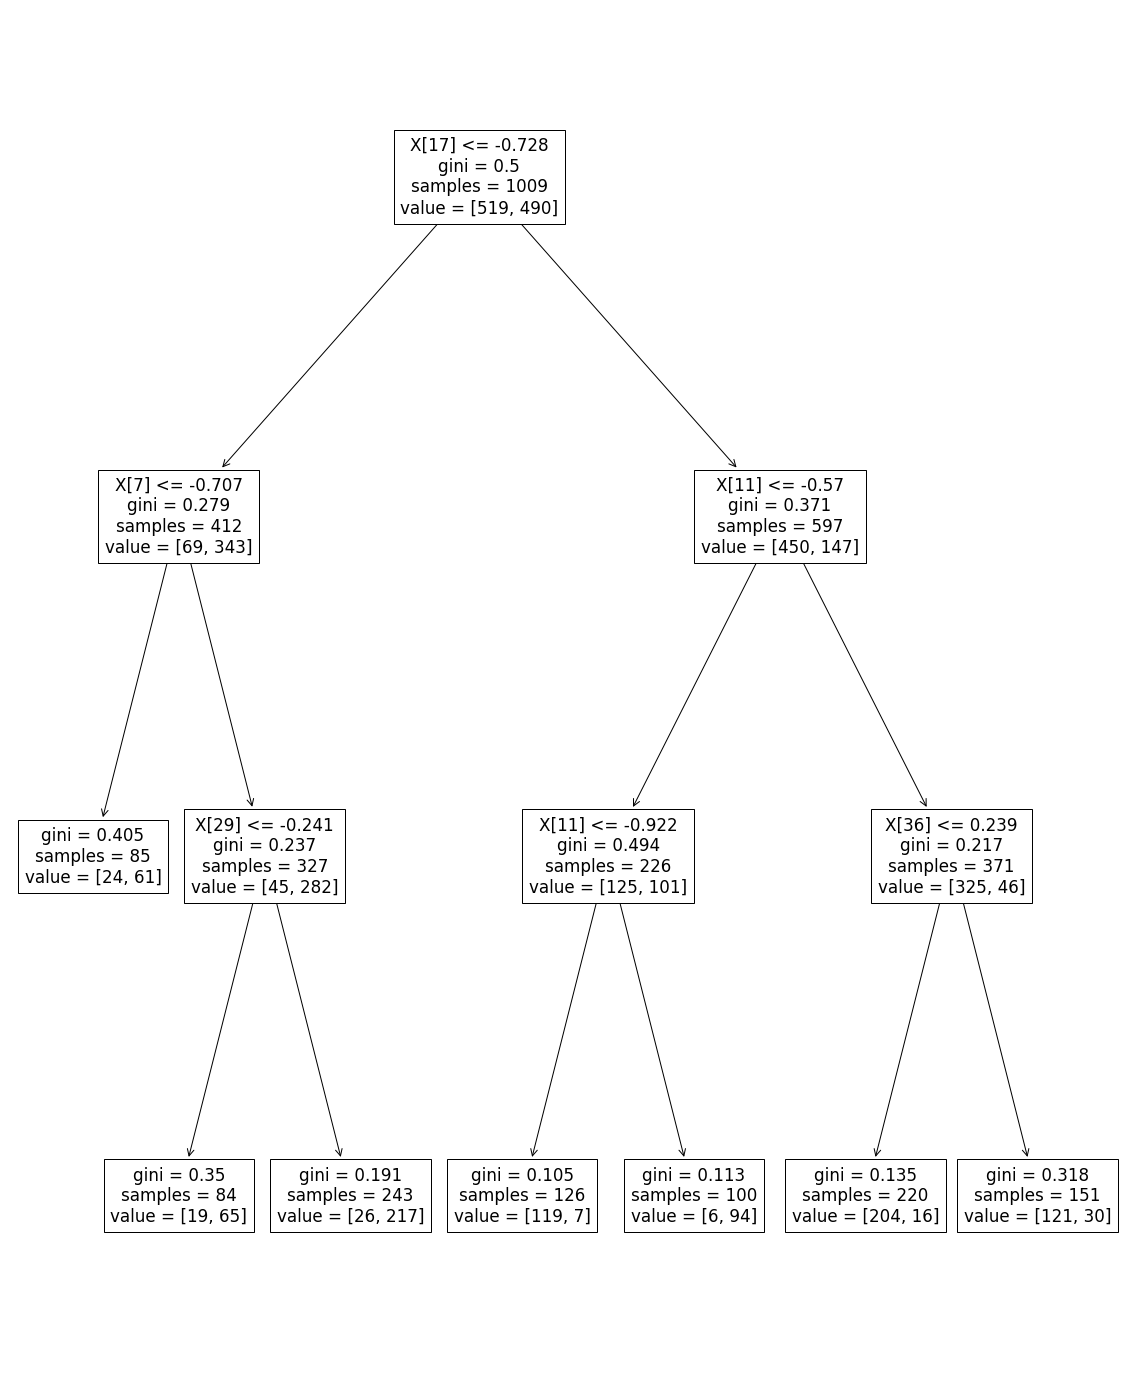

In [158]:
from sklearn import tree
g = plt.figure()
g.set_figwidth(20)
g.set_figheight(25)
tree.plot_tree(DTC)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, Y_ros, test_size = 0.3, random_state = 12345)

In [160]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1054, 40), (452, 40), (1054,), (452,))

In [161]:
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [162]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, log_reg.predict(X_test))
accuracy

0.7433628318584071

In [168]:
from sklearn.model_selection import RepeatedStratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X_ros, Y_ros, test_size = 0.3,random_state=)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [169]:
grid_result.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [171]:
grid_result.best_estimator_

LogisticRegression(C=0.01, solver='newton-cg')

In [172]:
LR = LogisticRegression(C= 0.01, penalty= 'l2', solver= 'newton-cg')
LR.fit(X_train,y_train)
predc = LR.predict(X_test)
acurracy_score = accuracy_score(y_test,predc)
print("Accuracy Score :",acurracy_score*100)

Accuracy Score : 73.67256637168141
